In [13]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from fonctions import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim
import nltk
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
import mpld3
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [14]:
stopwords_list = [
    'ab', 'ac', 'ad', 'adhic', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur',
    'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam',
    'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne',
    'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare',
    'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo',
    'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum',
    'ubi', 'uel', 'uero','.'
]


In [15]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_list]
    filtered_words = [word for word in words if word[:-1] not in stopwords_list]
    return ' '.join(filtered_words)
def join(text):
    return ' '.join(text)
def tolist(string):
    return ast.literal_eval(string)

In [16]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/codes/pdv_stopwords.xlsx'

In [17]:
df = pd.read_excel(file)

In [18]:
df['stop'] = df['stop'].apply(tolist).apply(join)

In [19]:
corpus = df['stop'].tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

In [21]:
def tf_idf_with_most_common_words(corpus, max_features=1000):

    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

In [23]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

num_topics = 6
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

document_topics = lda.transform(X)
assigned_topics = document_topics.argmax(axis=1)

num_clusters = num_topics
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(document_topics)

silhouette_avg = silhouette_score(document_topics, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.69


/home/noe/python/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/noe/python/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


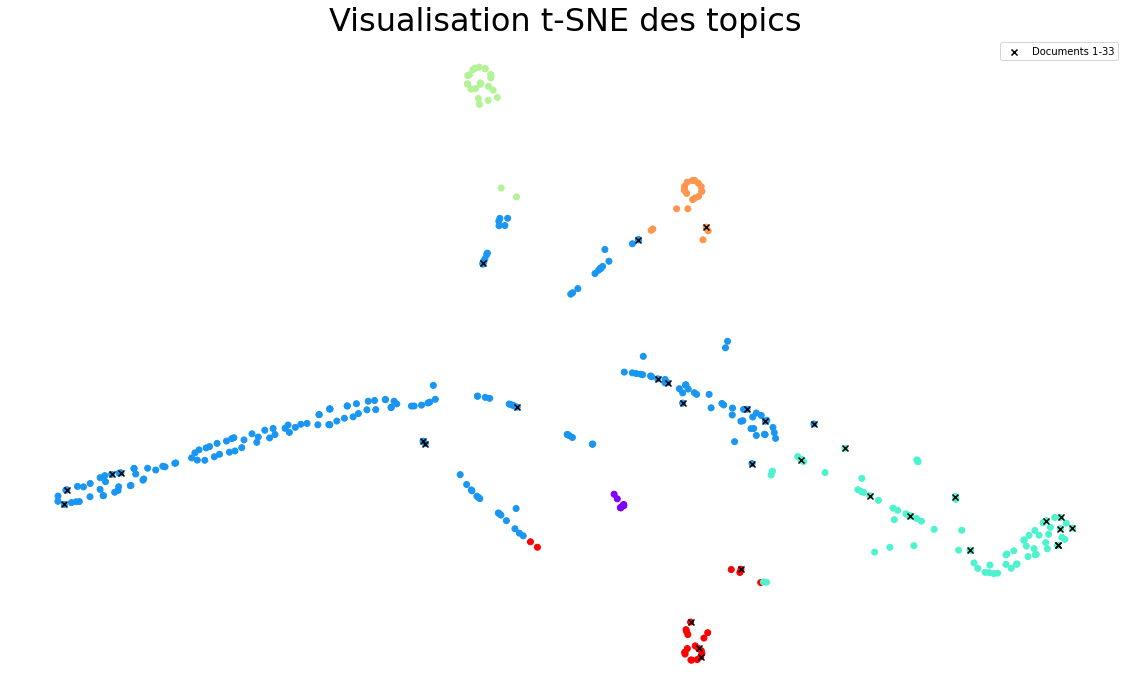

In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

num_topics = 6
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

document_topics = lda.fit_transform(X)
assigned_topics = document_topics.argmax(axis=1)



num_clusters = num_topics
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(document_topics)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(document_topics)


# Plot the results

plt.figure(figsize=(20, 12)) 
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='rainbow')
plt.scatter(tsne_result[:33, 0], tsne_result[:33, 1], c='black', marker='x', label='Documents 1-33')

plt.axis('off')
plt.title("Visualisation t-SNE des topics",fontsize=32)
plt.legend()

plt.savefig('Clusterisation par topic')
plt.show()



In [29]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import json


In [48]:
documents = [texte.split() for texte in corpus]
dictionary = Dictionary(documents)
final = [dictionary.doc2bow(texte) for texte in documents]

tfidf = TfidfModel(final)
corpus_tfidf = tfidf[final]



model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5, random_state=1, chunksize=1)


for idx, topic in model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    
coherence_model_lda = CoherenceModel(model=model, texts=documents, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)    

Topic: 0 
Words: 0.004*"notus2" + 0.004*"gratia" + 0.003*"officium" + 0.003*"offensa" + 0.003*"liberalitas" + 0.003*"seruitium" + 0.003*"fidelitas" + 0.003*"fides2" + 0.003*"exerceo" + 0.003*"petitio"
Topic: 1 
Words: 0.000*"notario" + 0.000*"ars" + 0.000*"accendo" + 0.000*"indictio" + 0.000*"medicina" + 0.000*"aduocatio" + 0.000*"impartus" + 0.000*"unctio" + 0.000*"condesco" + 0.000*"aperio"
Topic: 2 
Words: 0.000*"procliuis" + 0.000*"applaudo" + 0.000*"superstitiosus" + 0.000*"proscribo" + 0.000*"fatalitas" + 0.000*"exagero" + 0.000*"dulcis" + 0.000*"dispendiosus" + 0.000*"preuius" + 0.000*"lugubris"
Topic: 3 
Words: 0.000*"notario" + 0.000*"ars" + 0.000*"accendo" + 0.000*"indictio" + 0.000*"medicina" + 0.000*"aduocatio" + 0.000*"impartus" + 0.000*"unctio" + 0.000*"condesco" + 0.000*"aperio"
Topic: 4 
Words: 0.000*"fedelis" + 0.000*"poum" + 0.000*"perduto" + 0.000*"exordium" + 0.000*"epistola" + 0.000*"notario" + 0.000*"ars" + 0.000*"uolens" + 0.000*"figlus" + 0.000*"esordium"
Cohere

In [35]:
from gensim.models import CoherenceModel

# Compute coherence score
coherence_model_lda = CoherenceModel(model=model, texts=corpus_tfidf, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  nan


/home/noe/python/miniconda/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/home/noe/python/miniconda/lib/python3.9/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [19]:
for topic, words in model.print_topics():
    print('topic', topic)
    print(words)
    print()

topic 0
0.020*"sum1" + 0.006*"regnum" + 0.005*"fidelis2" + 0.005*"habeo" + 0.005*"debeo" + 0.005*"facio" + 0.004*"terra" + 0.004*"imperium" + 0.004*"possum1" + 0.004*"ciuitas"

topic 1
0.011*"sum1" + 0.008*"fidelis2" + 0.006*"seruitium" + 0.005*"pars" + 0.005*"mando2" + 0.005*"fides2" + 0.005*"deuotio" + 0.005*"possum1" + 0.004*"prouideo" + 0.004*"habeo"

topic 2
0.013*"sum1" + 0.011*"fidelis2" + 0.006*"possum1" + 0.005*"imperium" + 0.005*"pars" + 0.005*"facio" + 0.005*"regnum" + 0.004*"sic" + 0.004*"habeo" + 0.004*"terra"

topic 3
0.010*"sum1" + 0.008*"fidelis2" + 0.007*"pars" + 0.006*"sic" + 0.005*"possum1" + 0.005*"fides2" + 0.005*"habeo" + 0.004*"debeo" + 0.004*"uolo3" + 0.004*"filius"

topic 4
0.014*"sum1" + 0.007*"fidelis2" + 0.005*"fides2" + 0.005*"sic" + 0.005*"deuotio" + 0.004*"possum1" + 0.004*"facio" + 0.004*"pars" + 0.004*"seruitium" + 0.004*"tam"

